<a href="https://colab.research.google.com/github/Wang10026/gdp-dashboard/blob/main/Data_Manipulation_in_Python_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Manipulation in Python II

**Objectives**
* Learn Pandas Basics

**Things need to know**
* 对于0基础的同学，以了解为主
* 不需要可以从0把code写出来
* 这部分code与算法课程code的思维不一样
* 需要下课自己去跑一下code，尽量去理解
* 工具终归是辅助我们的，先尽力学会一个
* 逐步掌握python code debug能力

## Pandas

**Pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. It is already well on its way toward this goal.

The two primary data structures of pandas, **Series (1-dimensional)** and **DataFrame (2-dimensional)**, handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. pandas is **built on top of NumPy** and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

####**Load Data**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# read data from URL
iris = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
df_iris = pd.read_csv(iris, sep=',') #tsv
print(type(df_iris))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# Read data from Google Drive (recommend)
# Get sharable link and change the permission to "Anyone with the link can view"
# https://drive.google.com/file/d/1AbJ1P9aXcjut9ox5lh6oDx4uYnLY2HBQ/view?usp=sharing
# format: /d/<id>/view
# copy out the id: 1AbJ1P9aXcjut9ox5lh6oDx4uYnLY2HBQ
# replace the string in file_id
# https://drive.google.com/file/d/1-tg4jMyHPMinmYqOqC_WIVB40ezUs4Zq/view?usp=sharing

file_id='1-tg4jMyHPMinmYqOqC_WIVB40ezUs4Zq'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'

csv_url=link.format(FILE_ID=file_id)
df_uk_rain = pd.read_csv(csv_url)

In [ ]:
# https://colab.sandbox.google.com/notebooks/io.ipynb

In [ ]:
print(type(df_uk_rain))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df_uk_rain.columns

Index(['Water Year', 'Rain (mm) Oct-Sep', 'Outflow (m3/s) Oct-Sep',
       'Rain (mm) Dec-Feb', 'Outflow (m3/s) Dec-Feb', 'Rain (mm) Jun-Aug',
       'Outflow (m3/s) Jun-Aug'],
      dtype='object')

In [ ]:
df_uk_rain.columns = ['water_year','rain_octsep', 'outflow_octsep',
              'rain_decfeb', 'outflow_decfeb', 'rain_junaug', 'outflow_junaug']

In [ ]:
df_uk_rain.columns

Index(['water_year', 'rain_octsep', 'outflow_octsep', 'rain_decfeb',
       'outflow_decfeb', 'rain_junaug', 'outflow_junaug'],
      dtype='object')

In [ ]:
df_uk_rain.head() #default to be top 5 rows

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
1,1981,1098,5112,257,7316,242,1936
2,1982,1156,5701,330,8567,124,1802
3,1983,993,4265,391,8905,141,1078
4,1984,1182,5364,217,5813,343,4313


#### **Data Structure**

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index.

**DataFrame** is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object.

In [ ]:
# Series from list
s = pd.Series([1,3,5,6,8])

print(type(s))
s

<class 'pandas.core.series.Series'>


0    1
1    3
2    5
3    6
4    8
dtype: int64

In [ ]:
# Dataframe from dictionary
d = pd.DataFrame({'col1': [1,2,3,4,5,6],'col2': ['1', '2', '3', '4', '5', '6'], 'col3': ['1',2,3,4,5, None]})
print(d)

   col1 col2  col3
0     1    1     1
1     2    2     2
2     3    3     3
3     4    4     4
4     5    5     5
5     6    6  None


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   col1    6 non-null      int64 
 1   col2    6 non-null      object
 2   col3    5 non-null      object
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Dataframe first 10 rows
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df_iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [ ]:
# Dataframe stats information
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# column data type
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
# index info
print(df_iris.index)

RangeIndex(start=0, stop=150, step=1)


In [ ]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
# change column names
# pd.DataFrame.rename
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df_iris.columns = attributes

df_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
# iris dataset
# google dataset search
# https://datasetsearch.research.google.com/

#### **Indexing and Slicing**

In [ ]:
# use [] square brackets
df1 = df_iris['sepal_length']
print(df1.head())
print(type(df1))
#df_iris['sepal_length'] = 0

df2 = df_iris[['sepal_length']]
print(df2.head())
print(type(df2))

df3 = df_iris[['sepal_length', 'petal_length']]
print(df3.head())
print(type(df3))

df4 = df_iris[1:3]     [['sepal_length','petal_length']]
print(df4)
print(type(df4))

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64
<class 'pandas.core.series.Series'>
   sepal_length
0           5.1
1           4.9
2           4.7
3           4.6
4           5.0
<class 'pandas.core.frame.DataFrame'>
   sepal_length  petal_length
0           5.1           1.4
1           4.9           1.4
2           4.7           1.3
3           4.6           1.5
4           5.0           1.4
<class 'pandas.core.frame.DataFrame'>
   sepal_length  petal_length
1           4.9           1.4
2           4.7           1.3
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# selection by position, use iloc, endpoint is excluded
# start index (inclusive): end index (exclusive): step
df0 = df_iris.iloc[: , 3]
print(df0)
print(type(df0))

df1 = df_iris.iloc[:,[3]]
print(df1)
print(type(df1))

df2 = df_iris.iloc[3:5  ,    0:2]
print(df2)
print(type(df2))

df3 = df_iris.iloc[[1,2,4] , [0,2]]
print(df3)
print(type(df3))

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64
<class 'pandas.core.series.Series'>
     petal_width
0            0.2
1            0.2
2            0.2
3            0.2
4            0.2
..           ...
145          2.3
146          1.9
147          2.0
148          2.3
149          1.8

[150 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width
3           4.6          3.1
4           5.0          3.6
<class 'pandas.core.frame.DataFrame'>
   sepal_length  petal_length
1           4.9           1.4
2           4.7           1.3
4           5.0           1.4
<class 'pandas.core.frame.DataFrame'>


In [ ]:
# selection by label, use loc, endpoint is included!!!
# start point (inclusive) : end point (inclusive) : step
df1 = df_iris.loc[:, ['sepal_length']]
print(df1.head())
print(type(df1))

df2 = df_iris.loc[1:3 , ['sepal_length', 'petal_length']]
print(df2.head())
print(type(df2))

df3 = df_iris.loc[[1, 3], 'sepal_length':'petal_length']
print(df3)

   sepal_length
0           5.1
1           4.9
2           4.7
3           4.6
4           5.0
<class 'pandas.core.frame.DataFrame'>
   sepal_length  petal_length
1           4.9           1.4
2           4.7           1.3
3           4.6           1.5
<class 'pandas.core.frame.DataFrame'>
   sepal_length  sepal_width  petal_length
1           4.9          3.0           1.4
3           4.6          3.1           1.5


In [ ]:
# boolean masking
# and &
# or |

df1 = df_iris[(df_iris['sepal_length'] > 6.0) & (df_iris['petal_length'] < 5.0)]
print(df1)
print(type(df1))

     sepal_length  sepal_width  petal_length  petal_width       class
50            7.0          3.2           4.7          1.4  versicolor
51            6.4          3.2           4.5          1.5  versicolor
52            6.9          3.1           4.9          1.5  versicolor
54            6.5          2.8           4.6          1.5  versicolor
56            6.3          3.3           4.7          1.6  versicolor
58            6.6          2.9           4.6          1.3  versicolor
63            6.1          2.9           4.7          1.4  versicolor
65            6.7          3.1           4.4          1.4  versicolor
68            6.2          2.2           4.5          1.5  versicolor
71            6.1          2.8           4.0          1.3  versicolor
72            6.3          2.5           4.9          1.5  versicolor
73            6.1          2.8           4.7          1.2  versicolor
74            6.4          2.9           4.3          1.3  versicolor
75            6.6   

In [ ]:
df_iris['sepal_length'] > 6.0

0      False
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149    False
Name: sepal_length, Length: 150, dtype: bool

In [ ]:
(df_iris['sepal_length'] > 6.0) & (df_iris['petal_length'] < 5.0)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [ ]:
df1 = df1.reset_index(drop=False)
print(df1)

    index  sepal_length  sepal_width  petal_length  petal_width       class
0      50           7.0          3.2           4.7          1.4  versicolor
1      51           6.4          3.2           4.5          1.5  versicolor
2      52           6.9          3.1           4.9          1.5  versicolor
3      54           6.5          2.8           4.6          1.5  versicolor
4      56           6.3          3.3           4.7          1.6  versicolor
5      58           6.6          2.9           4.6          1.3  versicolor
6      63           6.1          2.9           4.7          1.4  versicolor
7      65           6.7          3.1           4.4          1.4  versicolor
8      68           6.2          2.2           4.5          1.5  versicolor
9      71           6.1          2.8           4.0          1.3  versicolor
10     72           6.3          2.5           4.9          1.5  versicolor
11     73           6.1          2.8           4.7          1.2  versicolor
12     74   

#### **(Advanced)Merging**

Read this [document](https://pandas.pydata.org/pandas-docs/stable/merging.html) for more info


In [ ]:
# two dataframe join or concatenate
df_right=pd.DataFrame({'year':np.arange(1980,1990),'rain_cn':np.arange(800,810)})
df_right2=pd.DataFrame({'year': [1991], 'rain_cn': [800]})

In [ ]:
df_right

,year,rain_cn
0,1980,800
1,1981,801
2,1982,802
3,1983,803
4,1984,804
5,1985,805
6,1986,806
7,1987,807
8,1988,808
9,1989,809


In [ ]:
df_right2

,year,rain_cn
0,1991,800


In [ ]:
df_right3=pd.concat([df_right, df_right2], ignore_index = True)
df_right3

,year,rain_cn
0,1980,800
1,1981,801
2,1982,802
3,1983,803
4,1984,804
5,1985,805
6,1986,806
7,1987,807
8,1988,808
9,1989,809


In [ ]:
df_right2.columns = ['year', 'rain_cn1']

In [ ]:
df_right2

,year,rain_cn1
0,1991,800


In [ ]:
df_right4=pd.concat([df_right, df_right2], ignore_index = True)
df_right4

,year,rain_cn,rain_cn1
0,1980,800.0,NaN
1,1981,801.0,NaN
2,1982,802.0,NaN
3,1983,803.0,NaN
4,1984,804.0,NaN
5,1985,805.0,NaN
6,1986,806.0,NaN
7,1987,807.0,NaN
8,1988,808.0,NaN
9,1989,809.0,NaN


In [ ]:
df_right4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      11 non-null     int64  
 1   rain_cn   10 non-null     float64
 2   rain_cn1  1 non-null      float64
dtypes: float64(2), int64(1)
memory usage: 392.0 bytes


In [ ]:
df_uk_rain.head(10)

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
1,1981,1098,5112,257,7316,242,1936
2,1982,1156,5701,330,8567,124,1802
3,1983,993,4265,391,8905,141,1078
4,1984,1182,5364,217,5813,343,4313
5,1985,1027,4991,304,7951,229,2595
6,1986,1151,5196,295,7593,267,2826
7,1987,1210,5572,343,8456,294,3154
8,1988,976,4330,309,6465,200,1440
9,1989,1130,4973,470,10520,209,1740


In [ ]:
df_right3.head(11)

,year,rain_cn
0,1980,800
1,1981,801
2,1982,802
3,1983,803
4,1984,804
5,1985,805
6,1986,806
7,1987,807
8,1988,808
9,1989,809


In [ ]:
# SQL like inner join:
df_join=pd.merge(df_uk_rain, df_right3, left_on='water_year',right_on='year',how='inner')
df_join

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug,year,rain_cn
0,1980,1182,5408,292,7248,174,2212,1980,800
1,1981,1098,5112,257,7316,242,1936,1981,801
2,1982,1156,5701,330,8567,124,1802,1982,802
3,1983,993,4265,391,8905,141,1078,1983,803
4,1984,1182,5364,217,5813,343,4313,1984,804
5,1985,1027,4991,304,7951,229,2595,1985,805
6,1986,1151,5196,295,7593,267,2826,1986,806
7,1987,1210,5572,343,8456,294,3154,1987,807
8,1988,976,4330,309,6465,200,1440,1988,808
9,1989,1130,4973,470,10520,209,1740,1989,809


In [ ]:
#(Advanced)Review and cross reference after learning SQL
"""
select dur.*, dr3.rain_cn
from df_uk_rain dur
inner join df_right3 dr on dur.water_year = dr.year
;
"""

'\nselect dur.*, dr3.rain_cn\nfrom df_uk_rain dur\ninner join df_right3 dr on dur.water_year = dr.year\n;\n'

#### **(Advanced)Grouping**

Read this [document](https://pandas.pydata.org/pandas-docs/stable/groupby.html) for more info

In [ ]:
# groupby: similar to SQL groupby
df_uk_rain.groupby(df_uk_rain['water_year'] // 10 *10)[['rain_octsep','outflow_octsep','rain_decfeb']].max()

,rain_octsep,outflow_octsep,rain_decfeb
water_year,,,
1980,1210,5701,470
1990,1268,5824,484
2000,1387,6391,437
2010,1285,5500,350


In [ ]:
df_uk_rain['water_year'] // 10 * 10

0     1980
1     1980
2     1980
3     1980
4     1980
5     1980
6     1980
7     1980
8     1980
9     1980
10    1990
11    1990
12    1990
13    1990
14    1990
15    1990
16    1990
17    1990
18    1990
19    1990
20    2000
21    2000
22    2000
23    2000
24    2000
25    2000
26    2000
27    2000
28    2000
29    2000
30    2010
31    2010
32    2010
Name: water_year, dtype: int64

## **Data Preprocessing**

(Advanced)

*   Duplication
*   Outlier
*   Missing Value



#### **Duplication**

In [ ]:
# check if a column has duplicates
df_uk_rain[df_uk_rain['rain_octsep'].duplicated(keep = False)]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
4,1984,1182,5364,217,5813,343,4313
6,1986,1151,5196,295,7593,267,2826
9,1989,1130,4973,470,10520,209,1740
11,1991,1151,4506,246,5493,280,2118
12,1992,1130,5246,308,8751,219,2551


In [ ]:
# create a duplicated row as the last row
df_dup=df_uk_rain
df_dup_addon=df_dup.iloc[[0]]
df_dup=pd.concat([df_dup, df_dup_addon], ignore_index=True)
df_dup.iloc[[0,-1]] # first and last row

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
33,1980,1182,5408,292,7248,174,2212


In [ ]:
# check duplicate rows
df_dup[df_dup.duplicated(keep=False)]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
33,1980,1182,5408,292,7248,174,2212


In [ ]:
# remove duplicates
df_dedup = df_dup.drop_duplicates()
df_dedup.iloc[[0,-1]]

,water_year,rain_octsep,outflow_octsep,rain_decfeb,outflow_decfeb,rain_junaug,outflow_junaug
0,1980,1182,5408,292,7248,174,2212
32,2012,1090,5329,350,9615,187,1797


#### **Outlier**

boxplot, winsorizing

![alt text](https://www.mathsisfun.com/data/images/outlier.svg)<br>
![alt text](https://statistics.laerd.com/statistical-guides/img/pearson-6.png)

<ipython-input-47-8b68fc173dad>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt_outlier)


<Axes: ylabel='Density'>

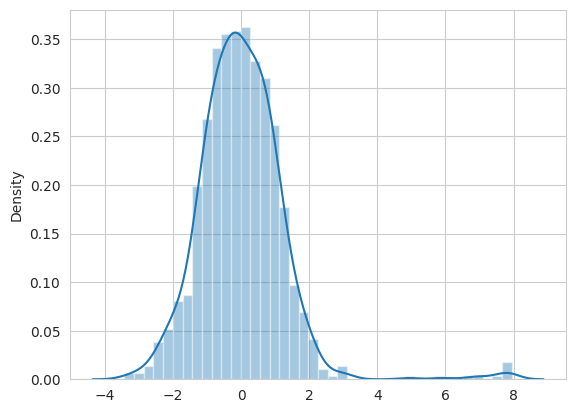

In [ ]:
import seaborn as sns
# Simulate data
dt_outlier=np.concatenate([np.random.randn(1000),np.random.normal(7,1,10)])
sns.set_style('whitegrid')
sns.distplot(dt_outlier)

Outlier Detection： Boxplot  <br>
Interquartile Range(IQR):
IQR= Upper Quartile(Q3) - Lower Quartile(Q1) <br>
Lower Limit = Q1 - 1.5 IQR <br>
Upper Limit = Q3 + 1.5 IQR <br>
![alt text](https://i.stack.imgur.com/mpbTr.gif)


<Axes: >

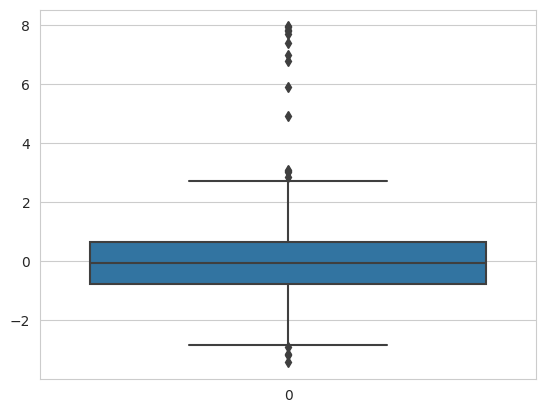

In [ ]:
sns.boxplot(dt_outlier,orient='v')

<Axes: >

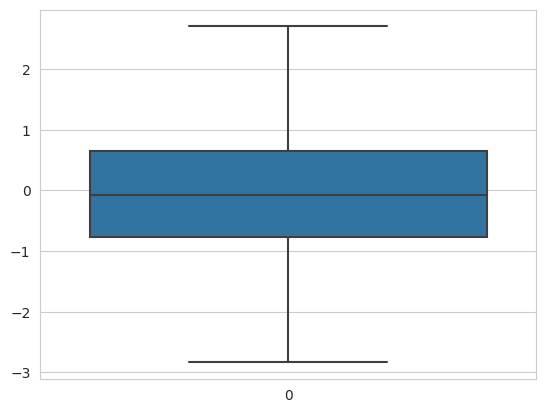

In [ ]:
# define a function remove outlier using IQR
def iqr_outlier_rm(dt_input):
  lq,uq=np.percentile(dt_input,[25,75])
  lower_l=lq - 1.5*(uq-lq)
  upper_l=uq + 1.5*(uq-lq)
  return dt_input[(dt_input >= lower_l) & (dt_input <= upper_l)]

dt_outlier_ws=iqr_outlier_rm(dt_outlier)
sns.boxplot(dt_outlier_ws,orient='v')

#### **Missing Value**

* What are the missing values?
* Why do we need to handle missing values?
  1. Data information loss.
  2. Lead to wrong prediction/classification.
  3. Sklearn machine learning models implementations do not support data with missing values.

* How to detect missing values?
* How to handle missing values?

  1. Elimination
  2. Imputation


In [ ]:
# create a dictionary
raw_data = {'name': ['Jason', np.nan, 'Mike', 'Rayman', 'Alex', 'Meimei'],
        'age': [36, np.nan, 36, 18, 36, 16],
        'gender': ['m', np.nan, 'm', np.nan, 'f', 'f'],
        'preMLScore': [1, np.nan, np.nan, 2, 3, 90],
        'postMLScore': [65, np.nan, np.nan, 62, 70, 100]}

# create a dataframe by passing a dictionary
df = pd.DataFrame(raw_data, columns = ['name', 'age', 'gender', 'preMLScore', 'postMLScore'])

In [ ]:
df

,name,age,gender,preMLScore,postMLScore
0,Jason,36.0,m,1.0,65.0
1,NaN,NaN,NaN,NaN,NaN
2,Mike,36.0,m,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0
4,Alex,36.0,f,3.0,70.0
5,Meimei,16.0,f,90.0,100.0


##### **Detect missing values**

In [ ]:
df.info() # the overview information for the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         5 non-null      object 
 1   age          5 non-null      float64
 2   gender       4 non-null      object 
 3   preMLScore   4 non-null      float64
 4   postMLScore  4 non-null      float64
dtypes: float64(3), object(2)
memory usage: 368.0+ bytes


In [ ]:
df.isnull()

,name,age,gender,preMLScore,postMLScore
0,False,False,False,False,False
1,True,True,True,True,True
2,False,False,False,True,True
3,False,False,True,False,False
4,False,False,False,False,False
5,False,False,False,False,False


In [ ]:
df.isnull().sum() # the number of rows with NaN for each column

name           1
age            1
gender         2
preMLScore     2
postMLScore    2
dtype: int64

In [ ]:
df.notnull().sum() # the number of rows without NaN for each column

name           5
age            5
gender         4
preMLScore     4
postMLScore    4
dtype: int64

In [ ]:
df.isnull().all(axis=1) # check if there is NaN row, operating on the column direction

0    False
1     True
2    False
3    False
4    False
5    False
dtype: bool

In [ ]:
df.isnull().any(axis=0) # check if there is a NaN in a column, operating on the row direction

name           True
age            True
gender         True
preMLScore     True
postMLScore    True
dtype: bool

##### **Handle Missing Values**

**Elimination**

In [ ]:
df

,name,age,gender,preMLScore,postMLScore
0,Jason,36.0,m,1.0,65.0
1,NaN,NaN,NaN,NaN,NaN
2,Mike,36.0,m,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0
4,Alex,36.0,f,3.0,70.0
5,Meimei,16.0,f,90.0,100.0


In [ ]:
df.dropna(axis=0, how='any') # drop the rows with any NaN, equal to df.dropna(axis=0, )

,name,age,gender,preMLScore,postMLScore
0,Jason,36.0,m,1.0,65.0
4,Alex,36.0,f,3.0,70.0
5,Meimei,16.0,f,90.0,100.0


In [ ]:
df.dropna(axis=1, how='any') # drop the columns with any NaN, equal to df.dropna(axis=0, )

""
0
1
2
3
4
5


In [ ]:
df = df.dropna(how='all', inplace=False)
#df.dropna(how='all', inplace=True)
df

,name,age,gender,preMLScore,postMLScore
0,Jason,36.0,m,1.0,65.0
2,Mike,36.0,m,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0
4,Alex,36.0,f,3.0,70.0
5,Meimei,16.0,f,90.0,100.0


In [ ]:
df['playgames'] = np.nan # add an address column that all the values are NaN
df

<ipython-input-15-57b29f6e92c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playgames'] = np.nan # add an address column that all the values are NaN


,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,NaN
2,Mike,36.0,m,NaN,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0,NaN
4,Alex,36.0,f,3.0,70.0,NaN
5,Meimei,16.0,f,90.0,100.0,NaN


In [ ]:
df.dropna(axis=1, how='any') # drop the column that all values are NaN

,name,age
0,Jason,36.0
2,Mike,36.0
3,Rayman,18.0
4,Alex,36.0
5,Meimei,16.0


In [ ]:
df

,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,NaN
2,Mike,36.0,m,NaN,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0,NaN
4,Alex,36.0,f,3.0,70.0,NaN
5,Meimei,16.0,f,90.0,100.0,NaN


In [ ]:
df.dropna(thresh = 5) # drop the rows without at least five actual value columns

,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,NaN
4,Alex,36.0,f,3.0,70.0,NaN
5,Meimei,16.0,f,90.0,100.0,NaN


**Imputation**
* Constant Value
* Forward/Backward Fill
* Median/Mean (numeric variables)
* Mode (categorical variables)

In [ ]:
df.fillna(0) # fill 0 to all missing values

,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,0.0
2,Mike,36.0,m,0.0,0.0,0.0
3,Rayman,18.0,0,2.0,62.0,0.0
4,Alex,36.0,f,3.0,70.0,0.0
5,Meimei,16.0,f,90.0,100.0,0.0


In [ ]:
df

,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,NaN
2,Mike,36.0,m,NaN,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0,NaN
4,Alex,36.0,f,3.0,70.0,NaN
5,Meimei,16.0,f,90.0,100.0,NaN


In [ ]:
df['gender'].fillna(method='ffill') # carry the forward value to the missing value

0    m
2    m
3    m
4    f
5    f
Name: gender, dtype: object

In [ ]:
df['gender'].fillna(method='bfill') # carry the backward value to the missing value

0    m
2    m
3    f
4    f
5    f
Name: gender, dtype: object

In [ ]:
df

,name,age,gender,preMLScore,postMLScore,playgames
0,Jason,36.0,m,1.0,65.0,NaN
2,Mike,36.0,m,NaN,NaN,NaN
3,Rayman,18.0,NaN,2.0,62.0,NaN
4,Alex,36.0,f,3.0,70.0,NaN
5,Meimei,16.0,f,90.0,100.0,NaN


In [ ]:
df["preMLScore"].fillna(df["preMLScore"].median()) # fill preMLScore with its median
#df = df["preMLScore"].fillna(df["preMLScore"].median())

0     1.0
2     2.5
3     2.0
4     3.0
5    90.0
Name: preMLScore, dtype: float64